# Hiver 2024 - Travail pratique 1

Remise électronique sur ZoneCours au plus tard le 21 février à 23h55 de:

Ce Jupyter notebook (.ipynb) en guise de rapport, une fois les réponses ajoutées.
Tous les fichiers .py nécessaires pour l'exécution du notebook
Le rapport doit:

être en format .ipynb (des points seront enlevés pour tout autre format).
inclure le numéro de matricule de tous les membres de l'équipe dans la première cellule (i.e. remplacez ces consignes)
répondre aux questions et discuter des résultats à l'aide de tables, graphiques, et cellules markdown
Barème:

40% Exactitude des résultats
25% Discussions complètes et concises (cellules ``markdown'')
20% Concision du notebook (.ipynb avec minimum de code) et clarté des graphiques
15% Clarté du code (.py)





In [1]:
import sys 
sys.path.append('C:/Users/harol/OneDrive/Documents/dorion_francois')
print(sys.path)



['C:\\Users\\harol\\TP1_produit_dérivé', 'C:\\Users\\harol\\anaconda3\\python311.zip', 'C:\\Users\\harol\\anaconda3\\DLLs', 'C:\\Users\\harol\\anaconda3\\Lib', 'C:\\Users\\harol\\anaconda3', '', 'C:\\Users\\harol\\anaconda3\\Lib\\site-packages', 'C:\\Users\\harol\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\harol\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\harol\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:/Users/harol/OneDrive/Documents/dorion_francois']


In [2]:
%matplotlib inline

# standard modules
import datetime as dt
import numpy as np
import pandas as pd
import pickle
import os
import warnings
import math
from scipy.special import erf
from scipy.stats import norm
from scipy.integrate import quad

#from concurrent.futures import ProcessPoolExecutor

# from the dorion_françois package
from plot_utils import plt
import black_merton_scholes as bms
from toolkit import (assert_unique, 
        date2str, nancorr, printdf, subcalendar, tic, toc,struct)
import binomial_tree as crr

# under development: this is bad practice ;)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import option_metrics as om

# standard modules
import datetime as dt
import numpy as np
import pandas as pd
import pickle
import os
import warnings

#from concurrent.futures import ProcessPoolExecutor

# from the dorion_françois package
from plot_utils import plt
import black_merton_scholes as bms
from toolkit import (assert_unique, 
        date2str, nancorr, printdf, subcalendar, tic, toc,struct)

# under development: this is bad practice ;)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import option_metrics as om

Le code qui suit vous est fourni pour que vous voyiez comment le fichier `pkl` que vous chargerez a été généré.

## Question 1

Le code qui suit charge en mémoire, traite et décrit sommairement les options sur Apple telle que cotées le 24 octobre, 2008. Discuter.

In [3]:
# Load the data and define moneyness (MNY)
#surface = om.load_pickle('secid101594_20081024.pkl')
with open('secid101594_20081024.pkl','rb') as fh:
    surface = pickle.load(fh)
surface = surface[~np.isnan(surface.implied_vol_bms)]

# Note that MNY as defined as follows:
# surface['MNY'] = surface.strike / surface.implied_forward_price


C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)
C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)
C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)
C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o

,date,exdate,YTM,DTM,implied_forward_price,n_obs
0,2008-10-24,2008-11-22,0.079452,29.0,96.528704,34
1,2008-10-24,2008-12-20,0.156164,57.0,96.733148,30
2,2008-10-24,2009-01-17,0.232877,85.0,96.862495,51
3,2008-10-24,2009-04-18,0.482192,176.0,97.456509,46
4,2008-10-24,2010-01-16,1.230137,449.0,99.535349,37
5,2008-10-24,2011-01-22,2.246575,820.0,101.889256,12


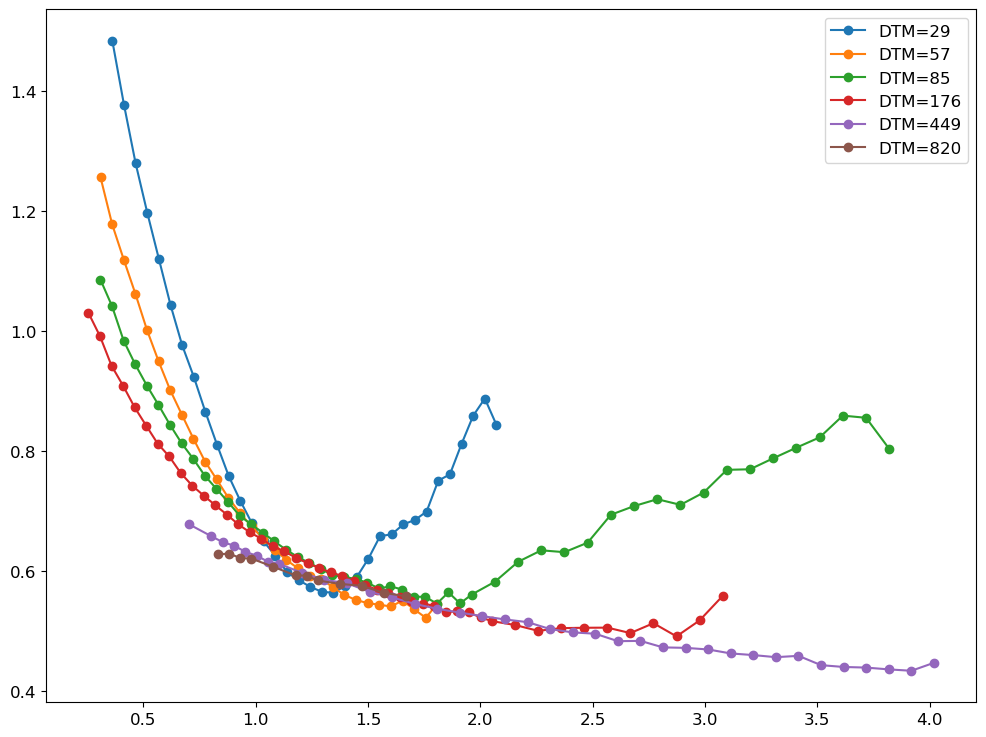

In [4]:
def summarize_surface(surface):
    summary = pd.DataFrame()
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))
    for no,smile in enumerate(om.Smile.iterator(surface)):
        smile._implied_forward_price = np.unique(smile.options.implied_forward_price)
        info = pd.DataFrame(smile.to_dict(),index=[no])    
        info['n_obs'] = smile.options.shape[0]
        summary = pd.concat((summary,info), axis=0)

        MNY = smile.options.MNY
        IV = smile.options.implied_vol_bms
        ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)
    ax.legend()
    return summary

summarize_surface(surface)

C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)
C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)
C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)
C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o

,date,exdate,YTM,DTM,implied_forward_price,n_obs
0,2008-10-24,2008-11-22,0.079452,29.0,96.528704,32
1,2008-10-24,2008-12-20,0.156164,57.0,96.733148,28
2,2008-10-24,2009-01-17,0.232877,85.0,96.862495,40
3,2008-10-24,2009-04-18,0.482192,176.0,97.456509,39
4,2008-10-24,2010-01-16,1.230137,449.0,99.535349,32
5,2008-10-24,2011-01-22,2.246575,820.0,101.889256,8


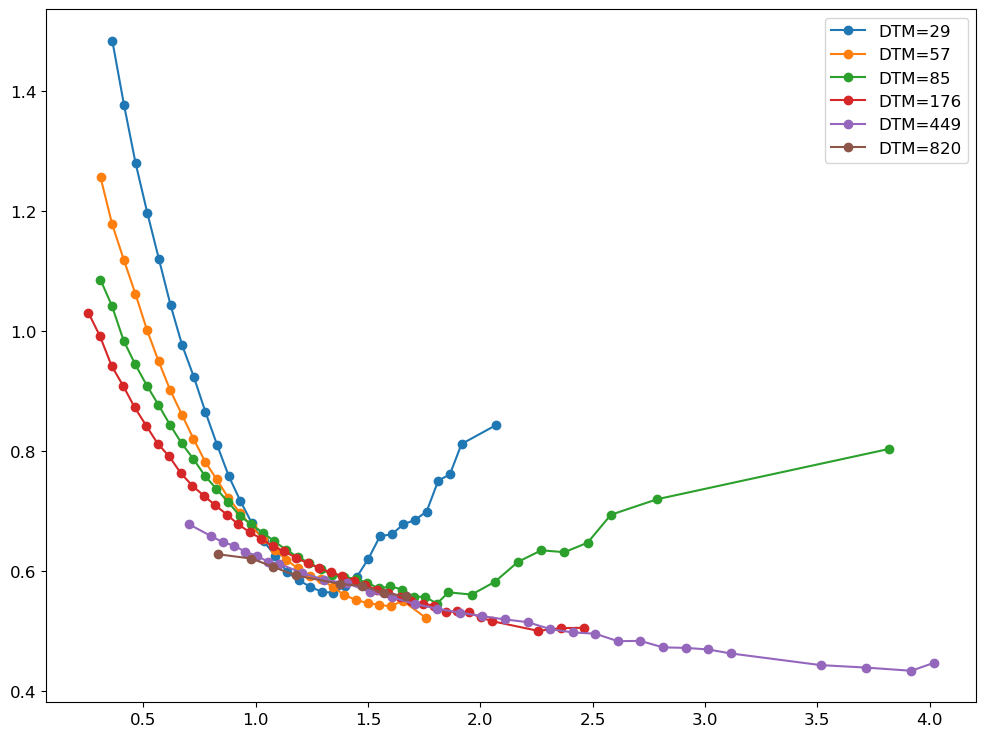

In [5]:
traded = surface[(surface.open_interest > 0) & (surface.volume > 0)]
summarize_surface(traded)

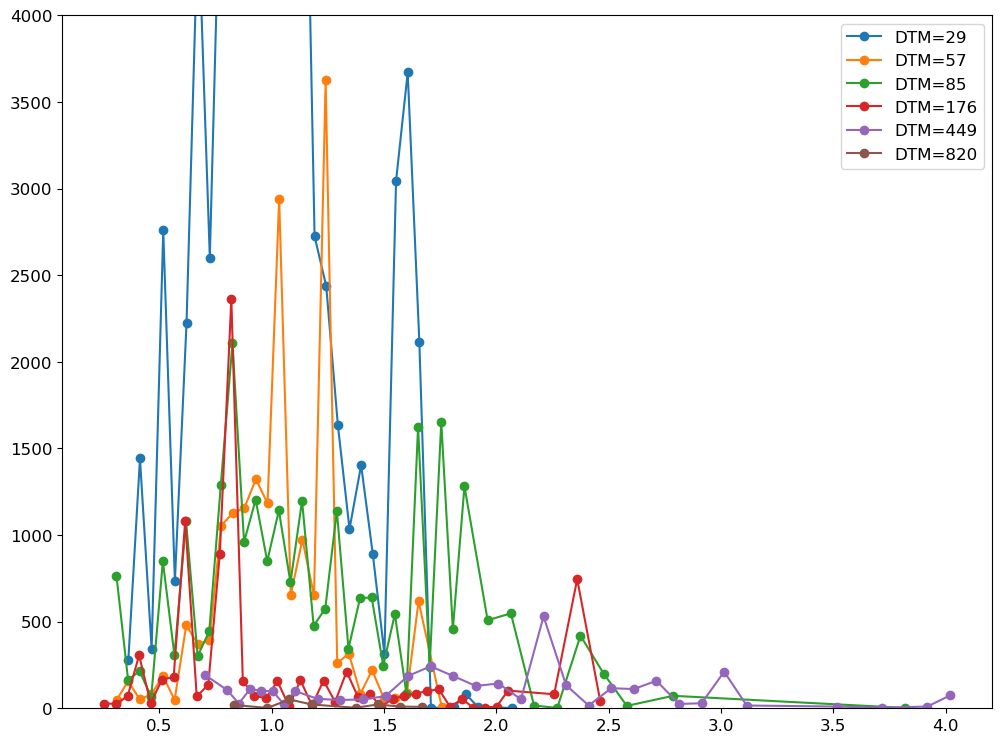

In [7]:
def plot_volume(surface):
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))
    for no,smile in enumerate(om.Smile.iterator(surface)):
        MNY = smile.options.MNY
        VOL = smile.options.volume
        #VOL = np.log(smile.options.volume)
        ax.plot(MNY, VOL, '-o', label='DTM=%d'%smile.DTM)
        ax.set_ylim([0, 4000])
    ax.legend()
plot_volume(traded)

Dans un premier temps ,nous pouvons deja observer que la volatilité n'est pas constant en fonction du sous-jacent et que  les options avec une plus longue maturité  ont une valeur plus élévé, cela peut s'expliquer par la valeur temporelle de l'option (valeur de report d'exercice). De plus nous pouvons remarquer que les options de vente   "hors-de-la-monnaie"  ont une volatilité plus elevé que les options de vente  à-la-monnaie.Plus l'option est hors de la monnaie plus sa volativité est grande.Tandis que les options d'achats  "hors-de-la-monnaie" avec maturité de 1 a 3 mois ont une volatilité plus plus élevé que celle à-la-monnaie mais a mesure que la maturité augmente la tendance s'inverse.Les options  d'achat ont tendance a avoir une volatilité plus faible.
interprétation:
Les options de vente "hors-de-la-monnaie"sont souvent utilisées comme une forme d'assurance contre les baisses significatives du prix de l'actif sous-jacent. En période d'incertitude ou de crainte de baisse, la demande pour ces options peut augmenter, ce qui pousse leur volatilité implicite à la hausse. Cela reflète le prix plus élevé que les investisseurs sont prêts à payer pour se protéger contre une baisse potentielle.
Les options d'achat"hors-de-la-monnaie" offrent un effet de levier élevé, permettant aux investisseurs de spéculer sur une hausse du prix de l'actif sous-jacent avec un investissement initial relativement faible. La volatilité implicite plus élevée pour les options d'achat "hors-de-la-monnaie" de courte maturité peut refléter l'anticipation de mouvements haussiers rapides.


Le volume des transactions sur les options avec une maturité plus courte est supérieur à celui des options avec une maturité plus longue. Les options de 3 mois ou moins de maturité, et qui sont au plus 50% hors de la monnaie ont le volume des transactions le plus important.

En somme, les observations des trois graphiques fournissent des indications sur la psychologie des traders et les attentes du marché. Le "smile" de volatilité montre que les traders attribuent une prime de risque plus élevée aux événements extrêmes (hausse ou baisse significative du sous-jacent) à court terme, tandis que pour les maturités plus longues, ce risque est perçu comme étant plus modéré. Les pics de volume sur des options spécifiques pourraient indiquer des stratégies de trading centrées sur ces échéances ou moneyness.

## Question 2

En partant de `surface`, créez un DataFrame `sample` qui est restreint aux options de 3 mois ou moins de maturité, et qui sont au plus 30% hors de la monnaie. Invoquez `summarize_surface(sample)` et décrivez plus en détail ce que l'on peut inférez quant l'évolution anticipée à travers le temps (maturités) des ailes gauches et droites de la distribution risque neutre avec à l'aide de ces options.

C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)
C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)
C:\Users\harol\AppData\Local\Temp\ipykernel_37804\1894340679.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.plot(MNY, IV, '-o', label='DTM=%d'%info.DTM)


,date,exdate,YTM,DTM,implied_forward_price,n_obs
0,2008-10-24,2008-11-22,0.079452,29.0,96.528704,12
1,2008-10-24,2008-12-20,0.156164,57.0,96.733148,12
2,2008-10-24,2009-01-17,0.232877,85.0,96.862495,12


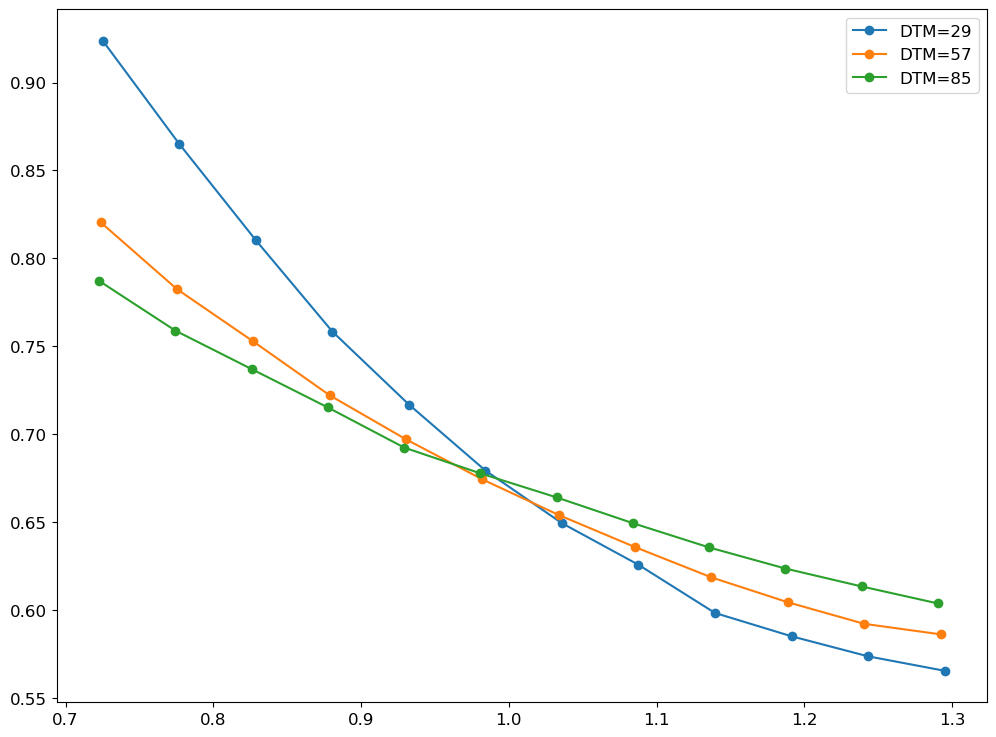

In [7]:
sample=surface[(surface.YTM <= 0.25) & ( surface.MNY >0.7)  &(surface.MNY <= 1.3) ]

summarize_surface(sample)

Les options avec une maturité courte ont une plus grande évolution de la votatilité anticipée que les options avec une maturité plus longue. La volatilié anticipée des options de vente est toujours supérieur à celle des options d'achat. La volatilité implicite diminue à mesure que MNY augmente.Rappelons que pour ailes Gauches de la distribution,les puts sont souvent utilisés pour se protéger contre les risques de l'aile gauche et pour l'Ailes Droites de la distribution , les calls peuvent être utilisés pour tirer parti des opportunités de l'aile droite (gains importants) .
DDonc la distribution implicite est aysmétrique à gauche et montre une aile gauche plus épaisse et une aile droite plus fine par rapport à la distribution normale standard.

## Question 3

Sous-échantillonez `sample` en un DataFrame `otm_puts` qui contiendra les 9 puts de 3 mois ou moins de maturité et de strike `[75, 85, 95]`. Ce sont des puts americans; considérons pour l'instant les puts européens de même charactéristiques. Utilisez la formule de BMS pour évaluer ces puts en posant, en particulier:
```
   S_exdiv = np.exp(-rf*T)*put.implied_forward_price
   y = 0 # The dividend yield
```

En vous inspirant du notebook `ch04_discrete_time`, tracer dans une figure 3x3 (e.g. `plt.subplots(3, 3, figsize=(20, 20))`) les graphes de convergences (avec l'ajustement de Broadie et Detemple) pour les 9 jeux de paramètres. Assurez-vous de bien identifier chacune des sous-figures à l'aide d'un titre décrivant l'option (`DTM,K`). Utilisez des marges de $\pm 50$bps. Décrivez la figure que vous obtenez.

À partir de combien de pas de temps (que nous dénoterons `N_star`) le prix dans l'arbre de toutes les options demeurrent-ils à l'intérieur de la tolérance de $\pm 50$bps?

In [8]:
otm_puts =sample[(~sample.is_call) & (sample.MNY < 1) & (sample['strike'].isin([75, 85, 95])) ] 
S_exdiv =np.exp(-otm_puts.risk_free*otm_puts.YTM)* otm_puts.implied_forward_price
y=0 # The dividend yield
BMS=bms.option_price(S_exdiv,otm_puts.strike,otm_puts.risk_free,y,otm_puts.YTM,otm_puts.implied_vol_bms,otm_puts.is_call,ret_delta=False)


In [9]:
#CRR Using the Broadie & Detemple adjustment
bin_price_adj_list = [] 
bin_price_Amer_list = [] 

#repetez le calcul 100 fois 
#temps_de_calcul_CRR = np.zeros(100)
#for z in range(100):
tic()
S_index=0   
for i, (index, row) in enumerate(otm_puts.iterrows()):
    S =S_exdiv.iloc[S_index] 
    K = row['strike']
    r = row['risk_free']
    y = 0
    T = row['YTM']
    sigma = row['implied_vol_bms']
    is_call = row['is_call']
    n_steps =np.arange(2,300)
    bin_price_adj = np.nan*n_steps
    bin_price_Amer=np.nan*n_steps
    for N in n_steps:
        _,CRR_euro,CRR_Amer,_,_ =crr.option_price(S, K, r, y, T, sigma, 
                                               N, is_call, bms_adj=True)
        bin_price_adj[N-2] = CRR_euro[0,0]
        bin_price_Amer[N-2] = CRR_Amer[0,0]
    S_index=S_index+1
    bin_price_adj_list.append(bin_price_adj)
    bin_price_Amer_list.append(bin_price_Amer)
      
toc()


Elapsed time: 357.632690 seconds.



357.63268999999855

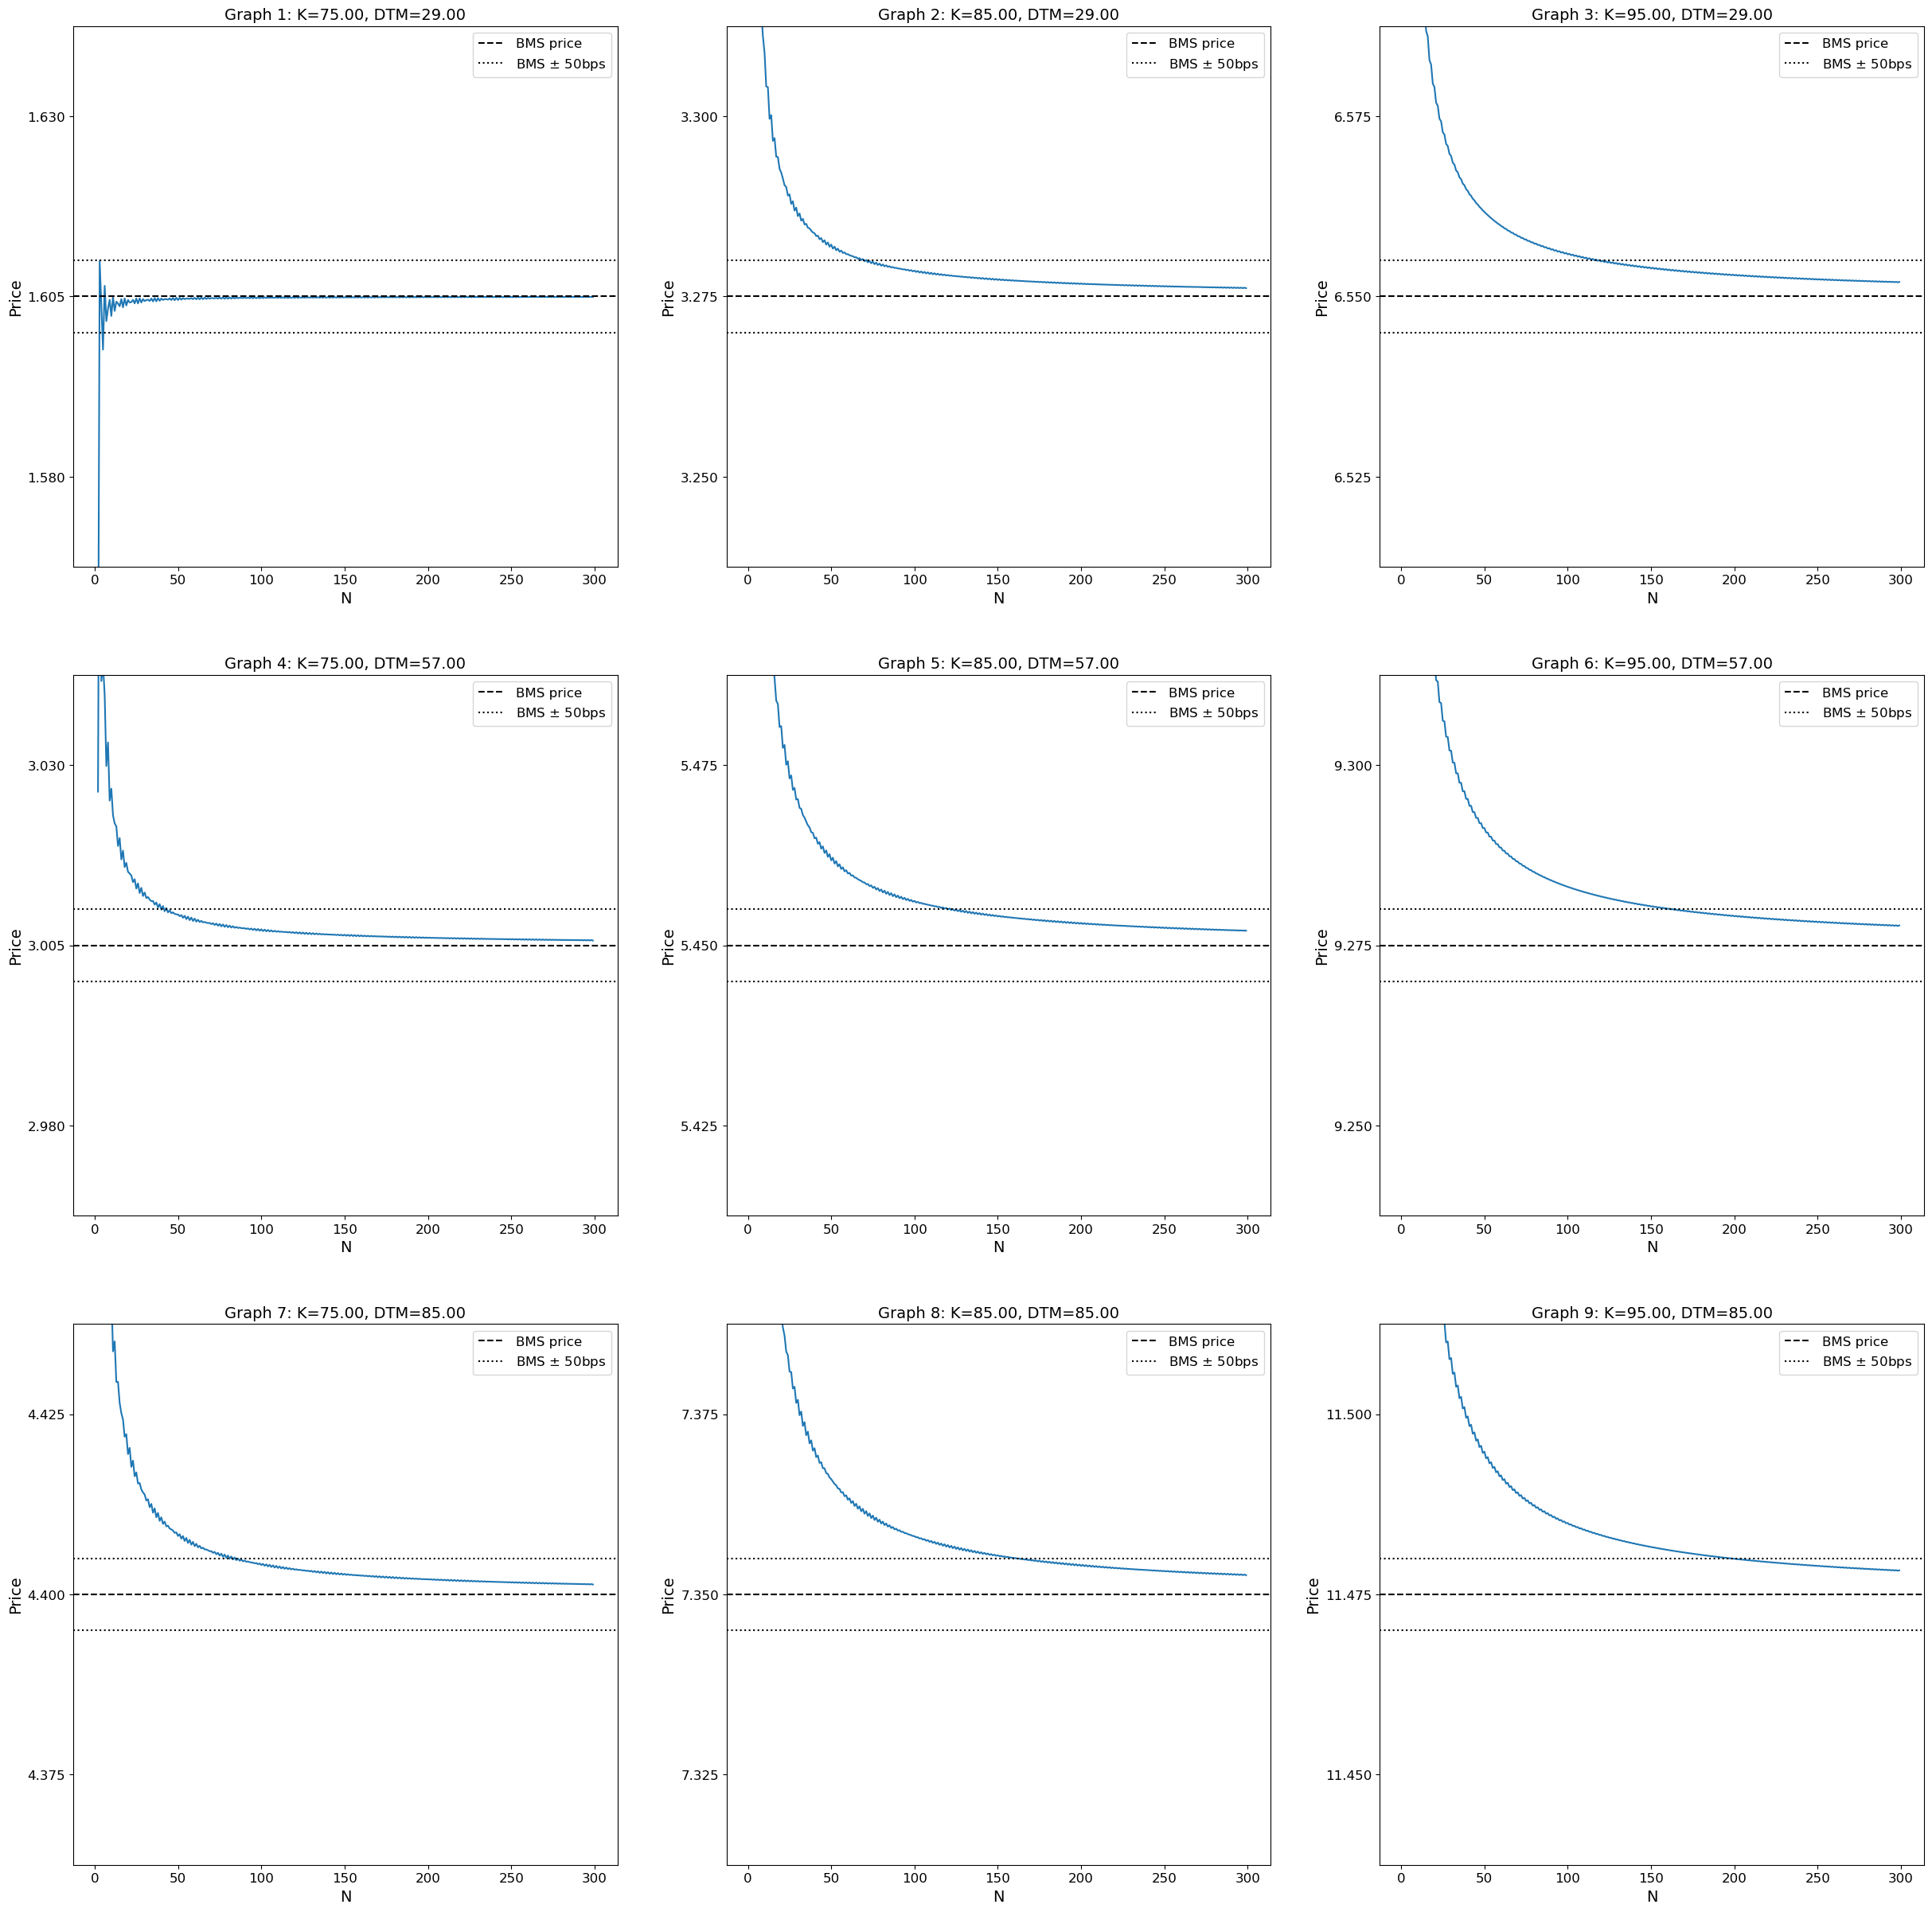

In [10]:
def plot_convergence(n_steps, bin_price_adj_list,BMS,bps=50):
    fig, ax=plt.subplots(3, 3, figsize=(30, 30))
 
    for i in range(9):
        row, col = divmod(i, 3)
        prices = bin_price_adj_list[i]
        c_BMS = BMS.iloc[i]
        k=otm_puts.iloc[i]['strike'] 
        Y=otm_puts.iloc[i]['DTM']
        ax[row, col].plot(n_steps, prices)
        ax[row, col].axhline(c_BMS, linestyle='--', color='k', label='BMS price')
        ax[row, col].axhline(c_BMS-bps/1e4, linestyle=':', color='k', label='BMS $\pm$ %dbps'%bps)
        ax[row, col].axhline(c_BMS+bps/1e4, linestyle=':', color='k')
        ax[row, col].set_xlabel('N')
        ax[row, col].set_ylabel('Price')
        ax[row, col].legend()
        off = 5*bps/1e4
        otm_puts.strike
        ax[row, col].set_yticks([c_BMS-off,c_BMS,c_BMS+off])
        ax[row, col].set_ylim([BMS.iloc[i]-1.5*off,BMS.iloc[i]+1.5*off])
        ax[row, col].set_title(f'Graph {i+1}: K={k:.2f}, DTM={Y:.2f}')
         
plot_convergence(n_steps,bin_price_adj_list,BMS)          

On sait que le prix de l'option du   modele de CRR converge   au fur et a mesure que N devient grand  vers le prix du modèle BMS avec un biais en generale. ces graphiques sont des graphiques de convergence du prix CRR au prix de BMS avec l'ajustement de Broalie et Detemple qui prouve que que la methode binomial(CRR) peut s'ameliorer quand le price ne  commence pas a la date terminal T mais a tN−1 = T − Δt en utilsant lesvaleurs de BMS  d'une option europenne avec les memes caracteristiques

Nous remarquons que  le prix dans l'arbre de toutes les options demeurent  à l'intérieur de la tolérance de ±50
bps autour de 200 pas de temps(N_Star=200).
 


## Question 4

Tabulez les valeur des 9 puts en question de la façons suivante:
```
  | DTM | K | BMS | CRR Euro | CRR Amer  | Marché |
```
où les valeurs CRR auront été obtenues à `N_star`. Vos résultats semblent probablement paradoxaux. Qu'est-ce qui explique l'incohérence des résultats? Comment pourrions-nous corriger la situation?

In [11]:
#CRR_AMER
bin_price_Amer_Nstar = []
for bin_price_Amer in bin_price_Amer_list[:9]:
        element = bin_price_Amer[200]
        bin_price_Amer_Nstar.append(element)
#CRR_EURO
bin_price_adj_Nstar = []
for bin_price_adj in bin_price_adj_list[:9]:
        element = bin_price_adj[200]
        bin_price_adj_Nstar.append(element)       

data1={"DTM":otm_puts.DTM,"K":otm_puts.strike,"BMS":BMS,"CRR Euro":bin_price_adj_Nstar,"CRR Amer":bin_price_Amer_Nstar,"Marché":otm_puts.option_price}      
resultat=pd.DataFrame(data1)
print(resultat)

    DTM     K     BMS   CRR Euro   CRR Amer  Marché
8    29  75.0   1.605   1.604914   1.606452   1.605
10   29  85.0   3.275   3.276779   3.281070   3.275
12   29  95.0   6.550   6.552882   6.564719   6.550
43   57  75.0   3.005   3.006039   3.011408   3.005
45   57  85.0   5.450   5.453088   5.465491   5.450
47   57  95.0   9.275   9.278996   9.305763   9.275
73   85  75.0   4.400   4.402094   4.412852   4.400
75   85  85.0   7.350   7.353913   7.375854   7.350
77   85  95.0  11.475  11.479877  11.521797  11.475


Cette incoherence peut s'expliquer par la discretisation du temps dans les modèles CRR .on peut corriger cela en rendant les pas de  temps  le plus infime possible(tendre vers 0) et rendre le nombre de pas de temps plus grand.

## Question 5

Négligeons maintenant cette incohérence et remplaçons la colonne `Marché` par une colonne de prix obtenus via l'approche de Carr, Jarrow et Myneni (1993):
```
  | DTM | K | BMS | CRR Euro | CRR Amer  | CJM |
```
Comment les colonnes `CRR Amer` et `CJM` se compare-t-elle? Répétez 100 fois le calculs de chacune de ce deux colonnes en prennant soin d'encadrer le tout d'appel à `tic()` et `toc()`. Comment le temps de calcul des deux méthodes se compare-t-il?

Frontière d'exercice de notre put

In [12]:
def frontiere_exercice(K,r,sigma,YTM,m):
    '''cette fonction permet d'obtenir la frontière d'exercice de notre put americain'''
    B = K*np.exp(-(r + (sigma**2)/2)*YTM)-sigma*np.sqrt(YTM)*m
    return B

Fonction qui calcule la prime d'exercice anticipée,

In [13]:
def v(S, K, r, sigma, T, m):
    '''Grace à cette fonction nous arrivons à calculer la prime anticipée à l'exercice du put'''
    A = r * K
    integrand = lambda t: np.exp(-r*t) * norm.cdf(-bms.d2(frontiere_exercice(K, r, sigma, T-t, m), S, r, 0, t, sigma), loc=0, scale=1)
    C, erreur = quad(integrand, 0, T)
    return A * C

La fonction bissection nous permet de trouver le m que nous utilisons dans la frontière d'exercices

In [14]:
def bissection(f, a, b, tol=1e-5):
    '''La fonction bissection est utilisé pour trouvé le m qui resout le problème dans dans CJM'''
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

Soit f(m) la fonction qui nous permettra d'obtenir m. Cherchons le m qui satisfait cette équation f(m) = 0.

In [15]:
def f(m,sigma, r, YTM):
    ''' Le m qui rend cette fonction nulle est celle qui est utilisée pour trouver le prix dans CJM'''
    beta = (3*sigma)/4 - r/(2*sigma) + m/(2*np.sqrt(YTM))
    A = sigma*np.exp(-(r+(sigma**2)/2)*(YTM)-sigma*m*np.sqrt(YTM))*norm.cdf(-m)
    B = (r*erf(np.sqrt(((beta**2)/2 + r)*(YTM))))/np.sqrt(beta**2 + 2*r)
    return A-B

Resultat pour la tarification de CJM

In [16]:
def CJM(S,K,r, sigma, T, m):
    ''' Cette fonction nous donne le prix d'une option d'après CJM'''
    return bms.option_price(S, K, r, 0, T, sigma,False,False) + v(S, K, r, sigma, T, m)

In [17]:
# Créer un dictionnaire avec des données
data = {
    'K': otm_puts.strike,
    'S': S_exdiv,
    'r': otm_puts.risk_free,
    'YTM': otm_puts.YTM,
    'sigma': otm_puts.implied_vol_bms
}

# Créer un DataFrame à partir du dictionnaire
data = pd.DataFrame(data)

Calcul du put européen et américain avec CJM

In [18]:
index = [8,10,12,43,45,47,73,75,77]
price_CJM = np.zeros(9)
BMS = np.zeros(9)
#reptez le calcul 100 fois 
temps_de_calcul_CJM = np.zeros(100)

for z in range(100):
    for i in range(9):
        j = index[i]
        # Paramètres
        S = data['S'][j] 
        K = data['K'][j]
        sigma = data['sigma'][j] 
        r = data['r'][j]
        YTM = data['YTM'][j]
        tic()
        price_CJM[i] = CJM(S,K,r, sigma, YTM, 190)
    temps_de_calcul_CJM[z] = toc()


Elapsed time: 0.232426 seconds.

Elapsed time: 0.217111 seconds.

Elapsed time: 0.180013 seconds.

Elapsed time: 0.177304 seconds.

Elapsed time: 0.176957 seconds.

Elapsed time: 0.202876 seconds.

Elapsed time: 0.131122 seconds.

Elapsed time: 0.152580 seconds.

Elapsed time: 0.153724 seconds.

Elapsed time: 0.155603 seconds.

Elapsed time: 0.160379 seconds.

Elapsed time: 0.156646 seconds.

Elapsed time: 0.167012 seconds.

Elapsed time: 0.176937 seconds.

Elapsed time: 0.192963 seconds.

Elapsed time: 0.165513 seconds.

Elapsed time: 0.133767 seconds.

Elapsed time: 0.140184 seconds.

Elapsed time: 0.105136 seconds.

Elapsed time: 0.169239 seconds.

Elapsed time: 0.159227 seconds.

Elapsed time: 0.173091 seconds.

Elapsed time: 0.155204 seconds.

Elapsed time: 0.124043 seconds.

Elapsed time: 0.121658 seconds.

Elapsed time: 0.134307 seconds.

Elapsed time: 0.121556 seconds.

Elapsed time: 0.137513 seconds.

Elapsed time: 0.132798 seconds.

Elapsed time: 0.154329 seconds.

Elapsed ti

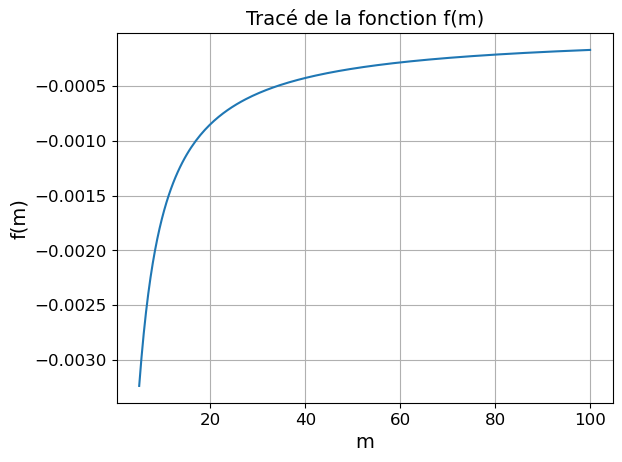

In [19]:


# Paramètres
S = data['S'][12] 
K = data['K'][12]
sigma = data['sigma'][12] 
r = data['r'][12]
YTM = data['YTM'][12]

# Générer des valeurs de m dans l'intervalle [0, 5]
m_values = np.linspace(100, 5, 200)

# Calculer les valeurs de f(m) correspondantes (en fixant t=0)
y_values = f(m_values, sigma, r, YTM)

# Tracer la fonction
plt.plot(m_values, y_values)
plt.xlabel('m')
plt.ylabel('f(m)')
plt.title('Tracé de la fonction f(m)')
plt.grid(True)
plt.show()

Solution de l'équation f(m)=0: 485.9999942481518

In [20]:
resultat2=resultat.drop('Marché',axis=1)
resultat2["CJM"]=price_CJM

In [21]:
resultat2

,DTM,K,BMS,CRR Euro,CRR Amer,CJM
8,29,75.0,1.605,1.604914,1.606452,1.785786
10,29,85.0,3.275,3.276779,3.281070,3.477446
12,29,95.0,6.550,6.552882,6.564719,6.768055
43,57,75.0,3.005,3.006039,3.011408,3.354930
45,57,85.0,5.450,5.453088,5.465491,5.841544
47,57,95.0,9.275,9.278996,9.305763,9.699944
73,85,75.0,4.400,4.402094,4.412852,4.898694
75,85,85.0,7.350,7.353913,7.375854,7.908261
77,85,95.0,11.475,11.479877,11.521797,12.083785



Nous remarquons que les prix obtenus dans les colonnes CRR et CJM sont sensiblement identiques. Mais pour toutes les lignes on remarque que le modèle de CJM donne des prix plus élevés que le modèle de CRR. 

Pour nos temps de calcul nous avons aussi des résultats beaucoup plus rapidement avec le modèle de CJM. Ce qui est sans doute normal parce que nous avons une forme fermée pour le calcul du prix dû put Américain. CRR utilise une subdivision de 200 pas avant de converger vers une bonne réponse.On 0.3 seconde pour CJM et 5 minuteS pour CRR


NB: le m utilisé pour le calcul de CJM est 190. Comme le montre le graphique de f(m) (qui est similaire pour tous nos  pu). le m qui rend la fonction f nul est +Inf. On avait déjà une convergence à partir de 190.

In [ ]:
calcul et affichage de l'intervalle de confiance du temps de calcul CRR CJM

In [22]:
# Créer un dictionnaire avec des données
Inter_temps = {
    'Inf': np.mean(temps_de_calcul_CJM) - 1.96*np.std(temps_de_calcul_CJM),
    'Moyenne': np.mean(temps_de_calcul_CJM),
    'Sup': np.mean(temps_de_calcul_CJM) + 1.96*np.std(temps_de_calcul_CJM),
    }

# Ajouter des noms de ligne
noms_lignes = ['CJM']

# Créer un DataFrame à partir du dictionnaire
Inter_temps = pd.DataFrame(Inter_temps, index=noms_lignes)

Inter_temps

,Inf,Moyenne,Sup
CJM,0.071486,0.151318,0.231151
